In [1]:
# from zipfile import ZipFile
# file_name="/content/drive/MyDrive/ColabNotebooks/dataset/fashion-product-images-small.zip"

# with ZipFile(file_name,'r') as zip:
#   zip.extractall(path="/content/drive/MyDrive/ColabNotebooks/dataset")
#   print('Done')

Copy file from G drive into the colab drive

In [2]:
!cp -r /content/drive/MyDrive/ColabNotebooks/dataset/fashion-product-images-small.zip .

unzip the dataset into dataset folder

In [3]:
from zipfile import ZipFile
file_name="/content/fashion-product-images-small.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall(path="dataset")
  print('Done')

Done


In [4]:
csvpath = '/content/dataset/styles.csv'
imgpath = '/content/dataset/images'
import os
imgfileslist = os.listdir(imgpath)

In [5]:
# !pip install opendatasets
# !pip install --upgrade opendatasets
# !pip install pandas
# !pip install tensorflow
# import opendatasets as od
# import pandas as pd
# from google.colab import userdata


from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [6]:
# import os
# key = os.environ["KAGGLE_KEY"]  = userdata.get('kagglekey')
# user = os.environ["KAGGLE_USERNAME"] = userdata.get('kaggleuser')
# #key = userdata.get('kagglekey')
# #print(os.environ["KAGGLE_USERNAME"] )
# os.environ.get('KAGGLE_USERNAME', userdata.get('kaggleuser'))
# os.environ.get("KAGGLE_KEY", userdata.get('kagglekey'))
# print(user)
# print(key)
# ds = od.download('https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small',data_dir="dataset")

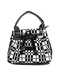

35913.jpg


In [7]:
from IPython.display import display, Image
display(Image(filename=imgpath+"/"+imgfileslist[5]))
print(imgfileslist[5])



In [8]:
import pandas as pd

origdf = pd.read_csv(csvpath, on_bad_lines='warn')
origdf.head()


Skipping line 6044: expected 10 fields, saw 11
Skipping line 6569: expected 10 fields, saw 11
Skipping line 7399: expected 10 fields, saw 11
Skipping line 7939: expected 10 fields, saw 11
Skipping line 9026: expected 10 fields, saw 11
Skipping line 10264: expected 10 fields, saw 11
Skipping line 10427: expected 10 fields, saw 11
Skipping line 10905: expected 10 fields, saw 11
Skipping line 11373: expected 10 fields, saw 11
Skipping line 11945: expected 10 fields, saw 11
Skipping line 14112: expected 10 fields, saw 11
Skipping line 14532: expected 10 fields, saw 11
Skipping line 15076: expected 10 fields, saw 12
Skipping line 29906: expected 10 fields, saw 11
Skipping line 31625: expected 10 fields, saw 11
Skipping line 33020: expected 10 fields, saw 11
Skipping line 35748: expected 10 fields, saw 11
Skipping line 35962: expected 10 fields, saw 11
Skipping line 37770: expected 10 fields, saw 11
Skipping line 38105: expected 10 fields, saw 11
Skipping line 38275: expected 10 fields, saw 

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [9]:
categorylist= ['id', 'articleType', 'baseColour']
df = origdf.filter(categorylist)
df.head()

,id,articleType,baseColour
0,15970,Shirts,Navy Blue
1,39386,Jeans,Blue
2,59263,Watches,Silver
3,21379,Track Pants,Black
4,53759,Tshirts,Grey


Clean the data

In [10]:
df.isna().sum()

id              0
articleType     0
baseColour     15
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

id             0
articleType    0
baseColour     0
dtype: int64

In [13]:
df['file_found'] = df['id'].apply(lambda x: f"{x}.jpg" in imgfileslist)
mask = df['file_found']
df = df[mask].reset_index(drop=True)

add filePath and fileName to the dataframe df

In [16]:
df['fileName']=df['id'].apply(lambda id: ''.join([str(id),'.jpg']))
df['filePath']=df['id'].apply(lambda id: ''.join([imgpath,"/",str(id),'.jpg']))
numberofimg = 22000
# df = df.head(numberofimg)
# df.shape

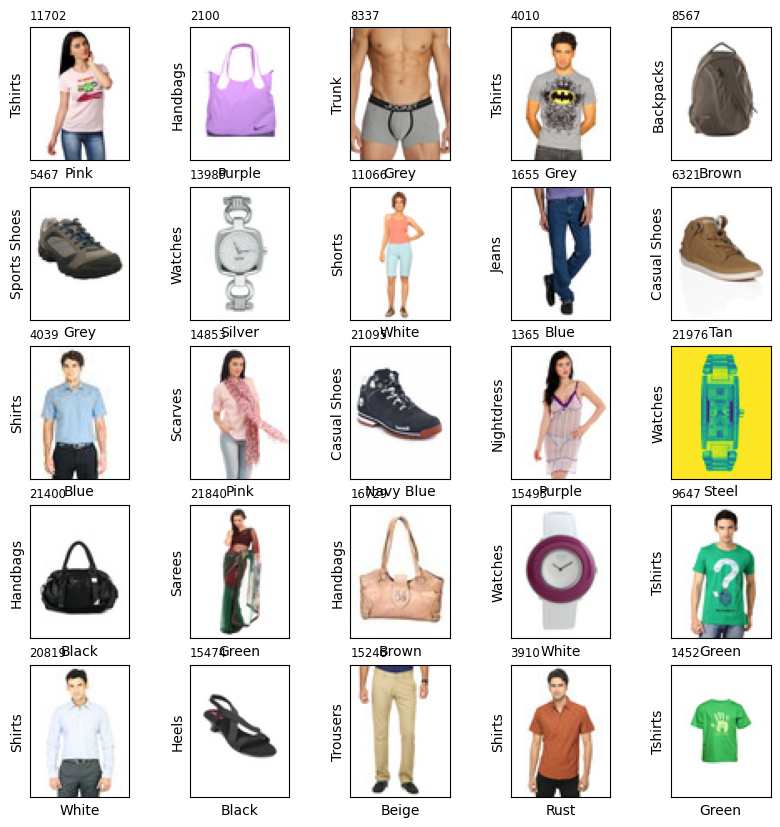

In [17]:
import matplotlib.pyplot as plt
from random import random

plt.figure(figsize=(10,10))
for i in range(25):
    #random number between 0 and 1000
    n=int(random()*numberofimg)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    imaget = plt.imread(df['filePath'][n])
    plt.imshow(imaget)

    plt.ylabel(df['articleType'][n])
    plt.xlabel(df['baseColour'][n])
    plt.title(n, loc='left', fontsize='small' )
plt.show()

In [18]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

Process the images

In [ ]:
#print(tf.__version__)

In [19]:
import pathlib
#print(imagespath) #/content/dataset/fashion-product-images-small/images
data_dir = pathlib.Path(imgpath).with_suffix('')

image_count = len(list(data_dir.glob('*.jpg')))
print(image_count)

images = list(data_dir.glob('*.jpg'))

44441


In [20]:
PIL.Image.open(images[-1])
import numpy as np
img = np.array(images[300])
print(img)

/content/dataset/images/52379.jpg


In [26]:
arttypelist= sorted(list(df["articleType"].explode().unique()))
print(arttypelist)
print(len(arttypelist))
output_layer_type = len(arttypelist)
basecolourlist= sorted(list(df["baseColour"].explode().unique()))
print(sorted(basecolourlist))
print(len(basecolourlist))
# for the size of !type! output layer
output_layer_type = len(arttypelist)
# for the size of !colour! output layer
output_layer_colour = len(basecolourlist)

['Accessory Gift Set', 'Baby Dolls', 'Backpacks', 'Bangle', 'Basketballs', 'Bath Robe', 'Beauty Accessory', 'Belts', 'Blazers', 'Body Lotion', 'Body Wash and Scrub', 'Booties', 'Boxers', 'Bra', 'Bracelet', 'Briefs', 'Camisoles', 'Capris', 'Caps', 'Casual Shoes', 'Churidar', 'Clothing Set', 'Clutches', 'Compact', 'Concealer', 'Cufflinks', 'Cushion Covers', 'Deodorant', 'Dresses', 'Duffel Bag', 'Dupatta', 'Earrings', 'Eye Cream', 'Eyeshadow', 'Face Moisturisers', 'Face Scrub and Exfoliator', 'Face Serum and Gel', 'Face Wash and Cleanser', 'Flats', 'Flip Flops', 'Footballs', 'Formal Shoes', 'Foundation and Primer', 'Fragrance Gift Set', 'Free Gifts', 'Gloves', 'Hair Accessory', 'Hair Colour', 'Handbags', 'Hat', 'Headband', 'Heels', 'Highlighter and Blush', 'Innerwear Vests', 'Ipad', 'Jackets', 'Jeans', 'Jeggings', 'Jewellery Set', 'Jumpsuit', 'Kajal and Eyeliner', 'Key chain', 'Kurta Sets', 'Kurtas', 'Kurtis', 'Laptop Bag', 'Leggings', 'Lehenga Choli', 'Lip Care', 'Lip Gloss', 'Lip Liner'

In [22]:
batch_size = 32
img_height = 60
img_width = 40

In [23]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

output_labels = ["articleType","baseColour"]

(X_filepath_train, X_filepath_test, y_train, y_test) = train_test_split(df["filePath"],df[output_labels], test_size=0.2, random_state=42)

label_encoders = {}
data_train = {}
data_test = {}

for item in output_labels:
    lab_encoder = LabelBinarizer()

    encoded_data_train = lab_encoder.fit_transform(y_train[item].to_numpy())

    encoded_data_test = lab_encoder.transform(y_test[item].to_numpy())

    label_encoders[item] = lab_encoder
    data_train[item] = encoded_data_train
    data_test[item] = encoded_data_test

print(y_train['baseColour'].to_numpy())
print(lab_encoder.inverse_transform(encoded_data_train))
print(lab_encoder.classes_)


['White' 'White' 'Black' ... 'Pink' 'White' 'Green']
['White' 'White' 'Black' ... 'Pink' 'White' 'Green']
['Beige' 'Black' 'Blue' 'Bronze' 'Brown' 'Burgundy' 'Charcoal'
 'Coffee Brown' 'Copper' 'Cream' 'Fluorescent Green' 'Gold' 'Green' 'Grey'
 'Grey Melange' 'Khaki' 'Lavender' 'Lime Green' 'Magenta' 'Maroon' 'Mauve'
 'Metallic' 'Multi' 'Mushroom Brown' 'Mustard' 'Navy Blue' 'Nude'
 'Off White' 'Olive' 'Orange' 'Peach' 'Pink' 'Purple' 'Red' 'Rose' 'Rust'
 'Sea Green' 'Silver' 'Skin' 'Steel' 'Tan' 'Taupe' 'Teal' 'Turquoise Blue'
 'White' 'Yellow']


In [28]:
from keras.preprocessing.image import load_img, img_to_array

def process_image(image_path):
    image = load_img(image_path, target_size=(img_width, img_height, 3))
    image = img_to_array(image)
    return image

def append_images(col):
    images = []
    for file_path in col:
        images.append(process_image(file_path))
    return np.array(images)

X_train = append_images(X_filepath_train)
X_test = append_images(X_filepath_test)



In [59]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.applications import VGG16
from keras.optimizers import Adam

cpumode = False

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Flatten output and add custom dense layers for classification
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)

# Output layer for the first label 'articleType'
output_articleType = Dense(output_layer_type, activation='softmax', name='articleType')(x)

# Output layer for the second label 'baseColour'
output_baseColour = Dense(output_layer_colour, activation='softmax', name='baseColour')(x)

# Define the model with multiple outputs
model = Model(inputs=base_model.input, outputs=[output_articleType, output_baseColour])

model.summary()

# Compile the model with appropriate losses and metrics for each output
model.compile(optimizer=Adam(),
              loss={'articleType': 'categorical_crossentropy', 'baseColour': 'categorical_crossentropy'},
              metrics={'articleType': 'accuracy', 'baseColour': 'accuracy'})

model.fit(x=X_train, y=data_train, batch_size = batch_size, epochs = 40 )

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 40, 60, 3)]          0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 40, 60, 64)           1792      ['input_3[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 40, 60, 64)           36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 20, 30, 64)           0         ['block1_conv2[0][0]']        
                                                                                            

Epoch 60/60
1111/1111 [==============================] - 15s 14ms/step - loss: 0.6829 - articleType_loss: 0.1877 - baseColour_loss: 0.4952 - articleType_accuracy: 0.9387 - baseColour_accuracy: 0.8433
<keras.src.callbacks.History at 0x7e315cffb820>

Epoch 40/40
1111/1111 [==============================] - 15s 14ms/step - loss: 0.8583 - articleType_loss: 0.2229 - baseColour_loss: 0.6355 - articleType_accuracy: 0.9236 - baseColour_accuracy: 0.7943
<keras.src.callbacks.History at 0x7b20dce30ca0>

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
==================================================================================================
 input_3 (InputLayer)        [(None, 80, 80, 3)]          0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 80, 80, 64)           1792      ['input_3[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 80, 80, 64)           36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 40, 40, 64)           0         ['block1_conv2[0][0]']        
                                                                                                  
 block2_conv1 (Conv2D)       (None, 40, 40, 128)          73856     ['block1_pool[0][0]']         
                                                                                                  
 block2_conv2 (Conv2D)       (None, 40, 40, 128)          147584    ['block2_conv1[0][0]']        
                                                                                                  
 block2_pool (MaxPooling2D)  (None, 20, 20, 128)          0         ['block2_conv2[0][0]']        
                                                                                                  
 block3_conv1 (Conv2D)       (None, 20, 20, 256)          295168    ['block2_pool[0][0]']         
                                                                                                  
 block3_conv2 (Conv2D)       (None, 20, 20, 256)          590080    ['block3_conv1[0][0]']        
                                                                                                  
 block3_conv3 (Conv2D)       (None, 20, 20, 256)          590080    ['block3_conv2[0][0]']        
                                                                                                  
 block3_pool (MaxPooling2D)  (None, 10, 10, 256)          0         ['block3_conv3[0][0]']        
                                                                                                  
 block4_conv1 (Conv2D)       (None, 10, 10, 512)          1180160   ['block3_pool[0][0]']         
                                                                                                  
 block4_conv2 (Conv2D)       (None, 10, 10, 512)          2359808   ['block4_conv1[0][0]']        
                                                                                                  
 block4_conv3 (Conv2D)       (None, 10, 10, 512)          2359808   ['block4_conv2[0][0]']        
                                                                                                  
 block4_pool (MaxPooling2D)  (None, 5, 5, 512)            0         ['block4_conv3[0][0]']        
                                                                                                  
 block5_conv1 (Conv2D)       (None, 5, 5, 512)            2359808   ['block4_pool[0][0]']         
                                                                                                  
 block5_conv2 (Conv2D)       (None, 5, 5, 512)            2359808   ['block5_conv1[0][0]']        
                                                                                                  
 block5_conv3 (Conv2D)       (None, 5, 5, 512)            2359808   ['block5_conv2[0][0]']        
                                                                                                  
 block5_pool (MaxPooling2D)  (None, 2, 2, 512)            0         ['block5_conv3[0][0]']        
                                                                                                  
 flatten_11 (Flatten)        (None, 2048)                 0         ['block5_pool[0][0]']         
                                                                                                  
 dense_19 (Dense)            (None, 512)                  1049088   ['flatten_11[0][0]']          
                                                                                                  
 articleType (Dense)         (None, 104)                  53352     ['dense_19[0][0]']            
                                                                                                  
 baseColour (Dense)          (None, 44)                   22572     ['dense_19[0][0]']            
                                                                                                  
==================================================================================================
Total params: 15839700 (60.42 MB)
Trainable params: 1125012 (4.29 MB)
Non-trainable params: 14714688 (56.13 MB)
__________________________________________________________________________________________________
Epoch 1/10
125/125 [==============================] - 328s 3s/step - loss: 13.6155 - articleType_loss: 5.5451 - baseColour_loss: 8.0704 - articleType_accuracy: 0.4972 - baseColour_accuracy: 0.2690
Epoch 2/10
125/125 [==============================] - 318s 3s/step - loss: 3.3378 - articleType_loss: 1.1613 - baseColour_loss: 2.1765 - articleType_accuracy: 0.7157 - baseColour_accuracy: 0.4672
Epoch 3/10
125/125 [==============================] - 328s 3s/step - loss: 2.2224 - articleType_loss: 0.6787 - baseColour_loss: 1.5437 - articleType_accuracy: 0.8138 - baseColour_accuracy: 0.5847
Epoch 4/10
125/125 [==============================] - 311s 2s/step - loss: 1.4957 - articleType_loss: 0.4207 - baseColour_loss: 1.0750 - articleType_accuracy: 0.8712 - baseColour_accuracy: 0.6963
Epoch 5/10
125/125 [==============================] - 315s 3s/step - loss: 1.1140 - articleType_loss: 0.2919 - baseColour_loss: 0.8221 - articleType_accuracy: 0.9133 - baseColour_accuracy: 0.7575
Epoch 6/10
125/125 [==============================] - 313s 3s/step - loss: 0.7753 - articleType_loss: 0.1855 - baseColour_loss: 0.5898 - articleType_accuracy: 0.9452 - baseColour_accuracy: 0.8267
Epoch 7/10
125/125 [==============================] - 314s 3s/step - loss: 0.6229 - articleType_loss: 0.1319 - baseColour_loss: 0.4910 - articleType_accuracy: 0.9580 - baseColour_accuracy: 0.8643
Epoch 8/10
125/125 [==============================] - 312s 2s/step - loss: 0.5344 - articleType_loss: 0.1156 - baseColour_loss: 0.4188 - articleType_accuracy: 0.9650 - baseColour_accuracy: 0.8823
Epoch 9/10
125/125 [==============================] - 308s 2s/step - loss: 0.4618 - articleType_loss: 0.1162 - baseColour_loss: 0.3456 - articleType_accuracy: 0.9660 - baseColour_accuracy: 0.8985
Epoch 10/10
125/125 [==============================] - 312s 2s/step - loss: 0.4947 - articleType_loss: 0.1161 - baseColour_loss: 0.3786 - articleType_accuracy: 0.9688 - baseColour_accuracy: 0.8990
<keras.src.callbacks.History at 0x780ea90a1d20>

In [30]:
cpumode = True


if cpumode:
  !cp -r /content/drive/MyDrive/ColabNotebooks/model.keras .
  model = tf.keras.models.load_model('model.keras')

  # Show the model architecture
  model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 40, 60, 3)]          0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 40, 60, 64)           1792      ['input_3[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 40, 60, 64)           36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 20, 30, 64)           0         ['block1_conv2[0][0]']        
                                                                                            

1/1 [==============================] - 1s 890ms/step


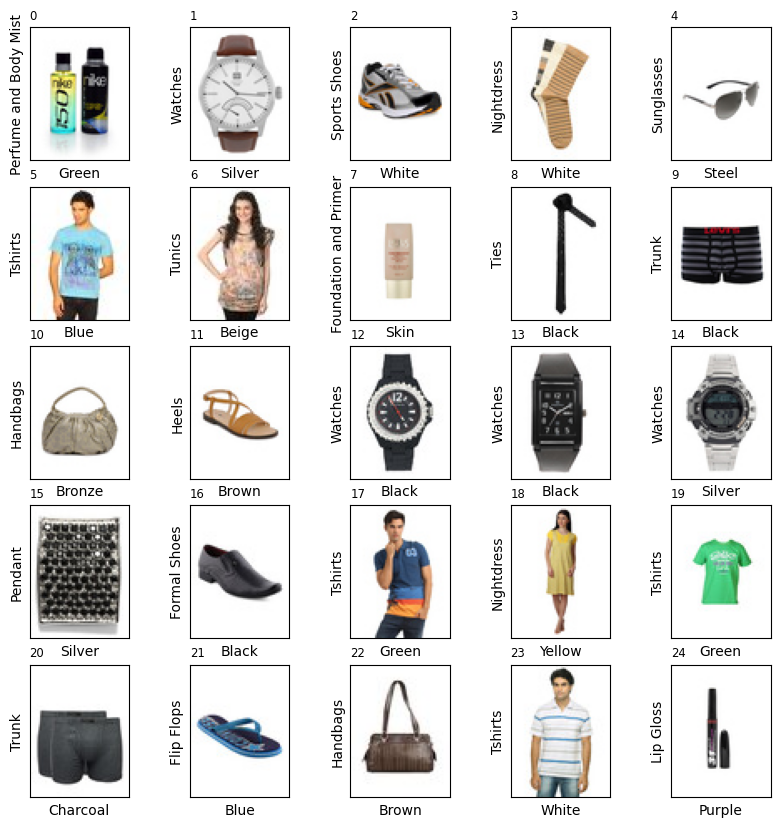

In [32]:
# Preprocess new data

new_data = []
picturelist = []

for img_path in df['filePath'][21000:21025]:
    preprocessed_img = process_image(img_path)
    new_data.append(preprocessed_img)
    picturelist.append(img_path)

# Convert the preprocessed data into a numpy array
X_new = np.array(new_data)


# Make predictions
predictions = model.predict(X_new)

# predictions will be a list containing predictions for each output

# Example processing for multiple outputs
predicted_labels_articleType = np.argmax(predictions[0], axis=1)
predicted_labels_baseColour = np.argmax(predictions[1], axis=1)


plt.figure(figsize=(10,10))
for i in range(len(picturelist)):

    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    imaget = plt.imread(picturelist[i])
    plt.imshow(imaget)

    plt.ylabel(arttypelist[predicted_labels_articleType[i]])
    plt.xlabel(basecolourlist[predicted_labels_baseColour[i]])
    plt.title(i, loc='left', fontsize='small' )
plt.show()



In [62]:
# model.save('/content/drive/MyDrive/ColabNotebooks/model.keras')